## Channels results
In this notebook I present the results for all the channels studied:
- **pp&#8594;tt̅**: leading-order channel with 4 diagrams;
- **gg&#8594;HH**: LO loop-induced channel with 16 diagrams;
- **gg&#8594;ZZ**: LO loop-induced channel with 28 diagrams.

For each channel a model is trained with 10k and 1M events, namely a low statistics and an high statistics sample. Additionally, the ability to learn cuts has been explored through a sample of **pp&#8594;tt̅** events where the outgoing quarks have a constraint on the pseudorapidity and transverse momentum:
- $p_T$ > 250 GeV;
- $-2.5 < \eta < 2.5$.

### Error bars and comparison between MC and GAN
**Histograms:**
For a fair comparison between the training and the generated sample, the next step is meaningful errors handling.
The error associated with the Monte Carlo histograms of the input features is the counting error for each bin calculated as the square root of the number of events $\sqrt{N}$. However, the analysis of the statistical and systematic errors of the GAN is more difficult to handle and left to further studies

**Correlations:**
To compare the correlation plots, initially a 2D histogram has been produced in a log-scale for the Mandelstam variables and linear for the rapidity. For each bin, the statistical counting error is calculated and it is compared to the relative error between the 2D histograms. The final plot shows the number of standard deviations within the relative error is contained. Additionally, these values are grouped in a second histogram and fitted to a Gaussian distribution to quantify the overall agreement in the kinematical space.

**Samples studied**:
* [pp&#8594;tt̅ - 10k events](#pptt10)
* [pp&#8594;tt̅ - 1000k events](#pptt1000)
* [gg&#8594;ZZ - 10k events](#ggzz10)
* [gg&#8594;ZZ - 1000k events](#ggzz1000)
* [gg&#8594;HH - 10k events](#gghh10)
* [gg&#8594;HH - 1000k events](#gghh1000)
* [pp&#8594;tt̅ - 10k events with cuts](#pptt10cuts)

**[Data augmentation](#DA)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plot_helper import load_sample, plt_inv, plt_corr, plt_err, get_event

### pp &#8594; tt̅ - 10k events <a class="anchor" id="pptt10"></a>

<img src="3.plots/hist_ppttbar_10k.png" >
<img src="3.plots/corr_ppttbar_10k.png" >
<img src="3.plots/std_ppttbar_10k.png" >
<img src="3.plots/bins_ppttbar_10k.png" >

### pp &#8594; tt̅ - 1000k events <a class="anchor" id="pptt1000"></a>

<img src="3.plots/hist_ppttbar_1000k.png" >
<img src="3.plots/corr_ppttbar_1000k.png" >
<img src="3.plots/std_ppttbar_1000k.png" >
<img src="3.plots/bins_ppttbar_1000k.png" >

### gg &#8594; ZZ - 10k events <a class="anchor" id="ggzz10"></a>

<img src="3.plots/hist_ggzz_10k.png" >
<img src="3.plots/corr_ggzz_10k.png" >
<img src="3.plots/std_ggzz_10k.png" >
<img src="3.plots/bins_ggzz_10k.png" >

### gg &#8594; ZZ - 1000k events <a class="anchor" id="ggzz1000"></a>

<img src="3.plots/hist_ggzz_1000k.png" >
<img src="3.plots/corr_ggzz_1000k.png" >
<img src="3.plots/std_ggzz_1000k.png" >
<img src="3.plots/bins_ggzz_1000k.png" >

### gg &#8594; HH - 10k events <a class="anchor" id="gghh10"></a>

<img src="3.plots/hist_gghh_10k.png" >
<img src="3.plots/corr_gghh_10k.png" >
<img src="3.plots/std_gghh_10k.png" >
<img src="3.plots/bins_gghh_10k.png" >

### gg &#8594; HH - 1000k events <a class="anchor" id="gghh1000"></a>

<img src="3.plots/hist_gghh_1000k.png" >
<img src="3.plots/corr_gghh_1000k.png" >
<img src="3.plots/std_gghh_1000k.png" >
<img src="3.plots/bins_gghh_1000k.png" >

### pp &#8594; tt̅ - 10k events with cuts <a class="anchor" id="pptt10cuts"></a>

In [2]:
invar_cuts_10k = load_sample('../../samples/ppttbar_10k_events_cuts.lhe')
pred_cuts_10k = np.loadtxt('gen_samples/ppttbar_cuts.txt')

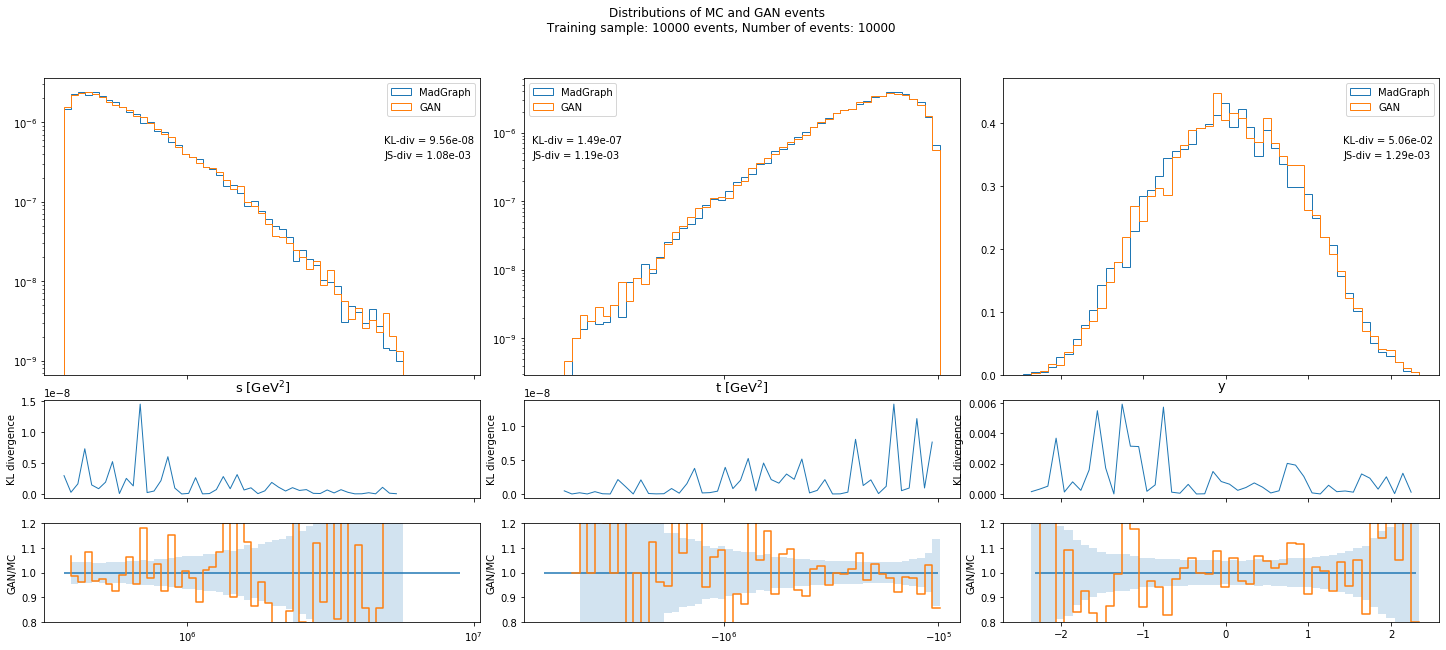

In [3]:
plt_inv(invar_cuts_10k, pred_cuts_10k, len(invar_cuts_10k))

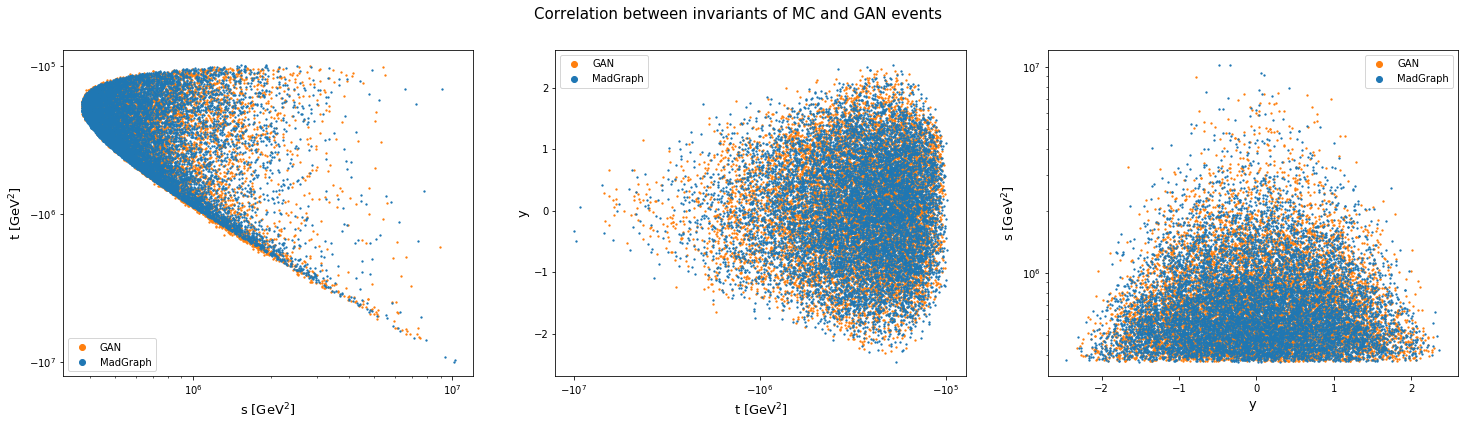

In [4]:
plt_corr(invar_cuts_10k, pred_cuts_10k)

In [5]:
ev_cuts = []
pt= []
eta = []
for i in range(len(pred_cuts_10k)):
    ev_cuts.append(get_event(pred_cuts_10k[i,0], pred_cuts_10k[i,1], pred_cuts_10k[i,2]))
for i in ev_cuts:
    pt.append(i.particles[2].p[1])
    eta.append(0.5*np.log((i.particles[2].e+i.particles[2].pz)/(i.particles[2].e-i.particles[2].pz)))

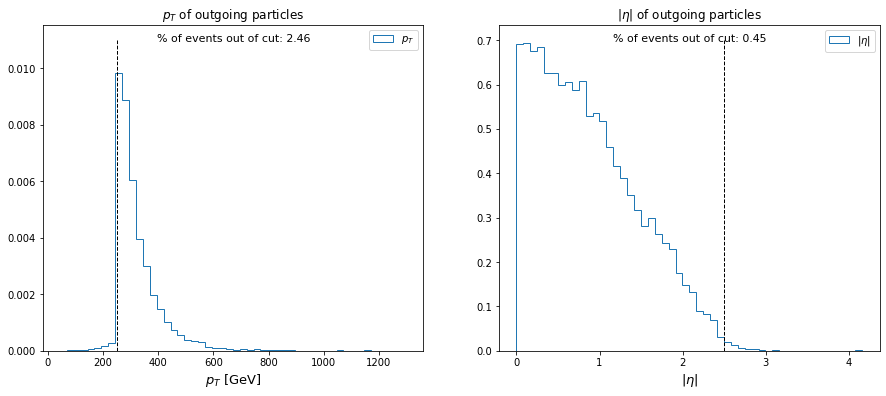

In [6]:
pt = np.array(pt)
eta = np.array(np.abs(eta))
out_eta = eta[eta>2.5]
out_pt = pt[pt<250]
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].hist(pt, bins=50, histtype='step', label='$p_T$', density=True)
ax[1].hist(np.abs(eta), bins=50, histtype='step', label='$|\eta|$', density=True)
ax[0].vlines(250, 0, 0.011, linestyle='--', linewidth=1)
ax[1].vlines(2.5,0, 0.7, linestyle='--', linewidth=1)
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('$p_T$ [GeV]', fontsize='13')
ax[1].set_xlabel('$|\eta|$', fontsize=13)
ax[0].set_title('$p_T$ of outgoing particles')
ax[1].set_title('$|\eta|$ of outgoing particles')
ax[0].annotate('% of events out of cut: {:.2f}'.format(len(out_pt)/(len(pt))*100), xy=(0.3, 0.95),xycoords='axes fraction', fontsize=11)
ax[1].annotate('% of events out of cut: {:.2f}'.format(len(out_eta)/(len(eta))*100), xy=(0.3, 0.95),xycoords='axes fraction', fontsize=11)
plt.show()

### Data augmentation <a class="anchor" id="DA"></a>

- The augmentation power of the models has been studied generating an increasing number of events starting from a given model and comparing the distributions with the Monte Carlo ones with an analogous number of events.


- The chosen points were 10k, 50k, 100k, 500k, and 1M events. For each point a model is trained, then 5 samples are generated and compared to the corresponding Monte Carlo ones. The result is a matrix-like figure where the MC events of the diagonal compose the training samples used.


- In the following plots, only the lower statistics training are shown. The first and the second row correspond respectively to the models trained with 10k and 50k events, while the columns represent the comparison to the MC sample up to 1M events.


- The results are collected in the last plots. Each figure contains the histograms of an entire row of the above plots and it represents the distribution of the standard deviations for all bins. On the left side, are reported the mean and the standard deviation of each histogram fitted to a Gaussian distribution

<p align="center">
    <b>pp &#8594; tt̅</b><br>
    <b>Mandelstam Variable s</b>
    <img src="3.plots/hists1_0_ppttbar.png" >
    <b>Mandelstam Variable t</b>
    <img src="3.plots/hists1_1_ppttbar.png" >
    <b>Rapidity y</b>
    <img src="3.plots/hists1_2_ppttbar.png" >
</p>

<p align="center">
    <b>Mandelstam Variables s - t</b>
    <img src="3.plots/summary_01_ppttbar.png" >
    <b>Mandelstam Variable t - Rapidity y</b>
    <img src="3.plots/summary_12_ppttbar.png" >
    <center><b>Rapidity y - Mandelstam Variable s</b></center>
<img src="3.plots/summary_20_ppttbar.png" >

<center><b>Mandelstam Variables s - t</b></center>
<img src="3.plots/hist_bins_01_ppttbar.png" >
<center><b>Mandelstam Variable t - Rapidity y</b></center>
<img src="3.plots/hist_bins_12_ppttbar.png" >
<center><b>Rapidity y - Mandelstam Variable s</b></center>
<img src="3.plots/hist_bins_20_ppttbar.png" >